In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import scipy

In [4]:
import tensorflow as tf

In [5]:
import keras

In [6]:
df = pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.shape #shape of the dataset to check if the entire dataset was downloaded or not.

(6362620, 11)

In [8]:
#cleaning the dataset
#1. checking for the NaN values(if any) using the .isnull() alternatively .notnull() could also be used.

In [9]:
df.isnull().sum() #the sum() gives the total NaN values for each column in the dataset

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.notnull() #will give true is there are float values will give false if there are string/NaN values present

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
6362615,True,True,True,True,True,True,True,True,True,True,True
6362616,True,True,True,True,True,True,True,True,True,True,True
6362617,True,True,True,True,True,True,True,True,True,True,True
6362618,True,True,True,True,True,True,True,True,True,True,True


In [11]:
#You see the entire dataset would be shown here like this but using sum gives a better understanding
df.notnull().sum() # will show the total rows that have atleast one NaN value.
# As we can see that the Dataset doesnot have any Null values and is good to go for Analysis section.

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

In [12]:
# both the isFraud and the isFlaggedFraud has values 0 and 1 where 0 means non-Fraudulent Transactions and 1 are Fraudulent 
#we will count the no. of Fraud and non-Fraud transactions in the Dataset
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [13]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [14]:
df['type'].unique() #it has 5 types of transactions in it, dtype is object aka string, we will encode this later which would give
#0,1,2,3,4 respectively

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [15]:
#We will drop the columns nameOrig and nameDest as they have no use in our ML model
df1 = df.drop(['nameOrig','nameDest'],axis = 1)
df1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [16]:
#Data pre-processing, We have the work in isFraud and isFlaggedFraud which are already in 0 and 1 but we will encode other labels
#importing the label encoder
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df1['type'] = encoder.fit_transform(df['type'])

In [17]:
#Now it shows encoded values for the type columns in machine-readable values
df1['type'].unique()

array([3, 4, 1, 2, 0])

In [18]:
df1.head(10) #All are numerical values

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,4,181.00,181.00,0.00,0.0,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,3,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,3,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,3,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,3,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,2,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


In [19]:
df1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


step                 AxesSubplot(0.125,0.786098;0.352273x0.0939024)
type              AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
amount               AxesSubplot(0.125,0.673415;0.352273x0.0939024)
oldbalanceOrg     AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
newbalanceOrig       AxesSubplot(0.125,0.560732;0.352273x0.0939024)
oldbalanceDest    AxesSubplot(0.547727,0.560732;0.352273x0.0939024)
newbalanceDest       AxesSubplot(0.125,0.448049;0.352273x0.0939024)
isFraud           AxesSubplot(0.547727,0.448049;0.352273x0.0939024)
isFlaggedFraud       AxesSubplot(0.125,0.335366;0.352273x0.0939024)
dtype: object

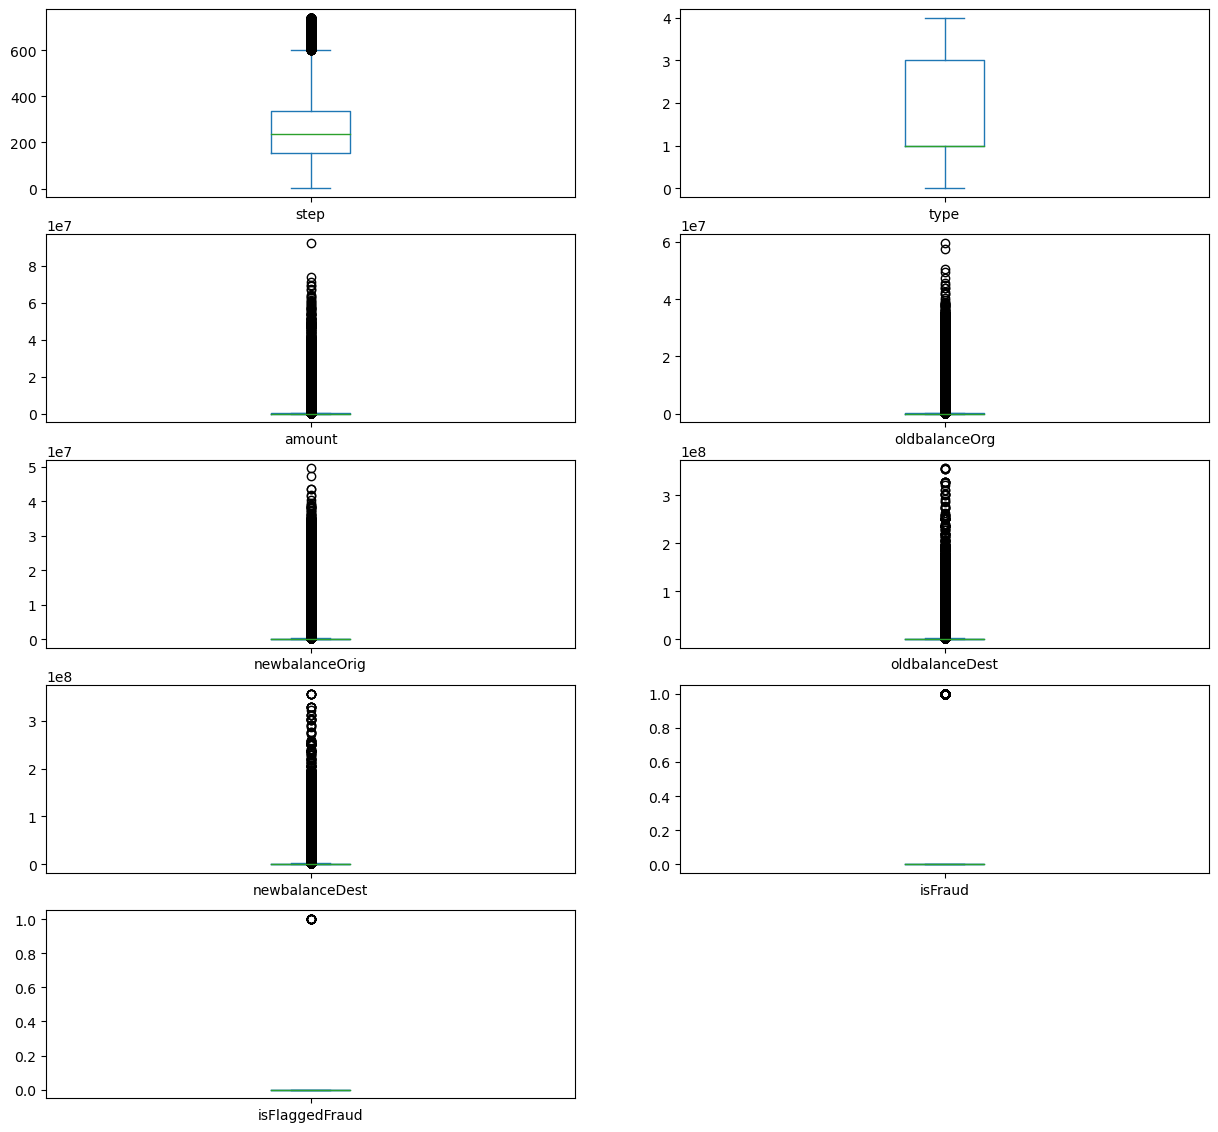

In [61]:
df1.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20)) #Detecting outliers using Box plot, the points above the 75% quartile
#signifies outliers

In [62]:
df1.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.714150e+00,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,1.350117e+00,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,3.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,4.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [63]:
df1.shape

(6362620, 9)

In [64]:
'''
IQR_isFr = 0.0
IQR_isFlFr = 0.0
IQR_nBlDst = 1.111909e+06
IQR_oBlDst = 9.430367e+05
IQR_nBlOrg = 1.442584e+05
IQR_oBlOrg = 1.073152e+05
IQR_amt = 2.087215e+05 - 1.338957e+04
IQR_type = 2.0
IQR_stp = 3.350000e+02 - 1.560000e+02
'''

'\nIQR_isFr = 0.0\nIQR_isFlFr = 0.0\nIQR_nBlDst = 1.111909e+06\nIQR_oBlDst = 9.430367e+05\nIQR_nBlOrg = 1.442584e+05\nIQR_oBlOrg = 1.073152e+05\nIQR_amt = 2.087215e+05 - 1.338957e+04\nIQR_type = 2.0\nIQR_stp = 3.350000e+02 - 1.560000e+02\n'

In [97]:
# We will be detecting the outliers only in the isFraud column since we will be including only those
# colummn in our ML model.
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 # Inter Quartile Range
    lb = Q1 - 1.5*IQR #Lower Bound/Limit
    ub = Q3 + 1.5*IQR #Upper Bound/Limit
    ls = df.index[(df[col] < lb) | (df[col] > ub)]
    return ls

In [98]:
index_lst = []
for columns in ['isFraud']:
    index_lst.extend(outliers(df1, columns))

In [99]:
len(index_lst)

8213

In [100]:
df1['isFraud'].unique()

array([0, 1], dtype=int64)

In [101]:
!pip install patsy

In [102]:
!pip install yellowbrick

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df1[['isFraud','isFlaggedFraud', 'amount', 'type', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,isFraud,1.186214
1,isFlaggedFraud,1.002528
2,amount,4.031381
3,type,1.103849
4,oldbalanceOrg,547.091828
5,newbalanceOrig,548.911892
6,oldbalanceDest,71.855502
7,newbalanceDest,83.730025


In [104]:
# As you can see from the above VIF( Variance Inflation Factor) that oldbalanceOrg and newbalanceOrig have very high correlation
#Same for the oldbalanceDest and newbalanceDest
#We will check the actual correlation values for the dataset below

In [105]:
df1.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006635,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.006635,1.000000,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833,0.002685
amount,0.022373,0.088419,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.339760,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.352758,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,-0.104679,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.059364,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.020833,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.002685,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [106]:
x, y = df1.loc[:,df1.columns != 'isFraud'], df1['isFraud'] #We are only taking into account the isFraud column for our detection system
#We will be checking the entire dataset without that column, splitting into train-test model

In [110]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.35,random_state=42)

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [114]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print("Accuracy :", metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.9992137111531323


In [ ]:
 #I have used the Logistic Regression Classifier model from the sklearn.linear_model library which gave an accuracy score of 99.9% 
# Also I have used a train-test split of 65-35 ratio.
#The amount transferred has a relationship with the Fraud as large amounts can lead to fraud but also small recurrent transactions may be fraud so the Company should be looking into that matter, and may limit the 
#transaction limit.
#-Aditya Bhowmik